In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from patsy import dmatrices

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import randomforest classifier
from sklearn.ensemble import RandomForestClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

#for validating your classification model
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.grid_search import GridSearchCV

from IPython.display import Image
from IPython.core.display import HTML

In [12]:
#import patient data
df = pd.read_csv('data/df_clean_NoString.csv')
df.head(5)

,ID,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,0,3,0,8,0,3,1,4,5,0,...,0,0,0,0,0,0,0,0,1,1
1,1,3,0,7,0,5,3,1,6,7,...,0,3,0,0,0,0,0,1,1,0
2,2,5,0,6,0,1,22,7,4,14,...,0,2,0,0,0,0,0,0,1,0
3,3,3,1,7,0,1,1,7,3,0,...,0,2,0,0,0,0,0,0,1,1
4,4,3,0,3,0,2,1,1,3,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#drop or remove the column 'ID' since this column is not used in the analysis and disply the result
df = df.drop('ID', axis=1)
df.head(5)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,MED_SPEC_NUM,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,3,0,8,0,3,1,4,5,0,0,...,0,0,0,0,0,0,0,0,1,1
1,3,0,7,0,5,3,1,6,7,0,...,0,3,0,0,0,0,0,1,1,0
2,5,0,6,0,1,22,7,4,14,18,...,0,2,0,0,0,0,0,0,1,0
3,3,1,7,0,1,1,7,3,0,18,...,0,2,0,0,0,0,0,0,1,1
4,3,0,3,0,2,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 48 columns):
race                        56000 non-null int64
gender                      56000 non-null int64
age                         56000 non-null int64
weight                      56000 non-null int64
admission_type_id           56000 non-null int64
discharge_disposition_id    56000 non-null int64
admission_source_id         56000 non-null int64
time_in_hospital            56000 non-null int64
payer_code                  56000 non-null int64
MED_SPEC_NUM                56000 non-null int64
num_lab_procedures          56000 non-null int64
num_procedures              56000 non-null int64
num_medications             56000 non-null int64
number_outpatient           56000 non-null int64
number_emergency            56000 non-null int64
number_inpatient            56000 non-null int64
DIAG_1_NUM                  56000 non-null int64
DIAG_2_NUM                  56000 non-null int64
DIAG_3_NU

# Exploratory data analysis

In [15]:
# basic statistics
df.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,MED_SPEC_NUM,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,...,56000.0,56000.000000,56000.000000,56000.000000,56000.0,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,2.602071,0.464464,6.096589,0.123946,2.016893,3.721821,5.756643,4.398161,4.369375,10.668643,...,0.0,1.058839,0.013214,0.000321,0.0,0.000036,0.000036,0.462679,0.769821,0.572268
std,0.937754,0.498740,1.590761,0.712004,1.438340,5.291517,4.053838,2.984346,4.363828,15.595799,...,0.0,1.102484,0.162472,0.025353,0.0,0.008452,0.008452,0.498610,0.420951,0.685018
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,0.000000,6.000000,0.000000,1.000000,1.000000,7.000000,4.000000,6.000000,4.000000,...,0.0,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,7.000000,0.000000,3.000000,4.000000,7.000000,6.000000,7.000000,18.000000,...,0.0,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,1.000000,1.000000
max,5.000000,1.000000,9.000000,9.000000,8.000000,28.000000,25.000000,14.000000,16.000000,63.000000,...,0.0,3.000000,3.000000,2.000000,0.0,2.000000,2.000000,1.000000,1.000000,2.000000


In [16]:
df.corr()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,MED_SPEC_NUM,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
race,1.000000,0.061706,0.114255,0.040520,0.096587,0.005805,0.033113,-0.020364,0.041640,-0.030777,...,NaN,-0.039862,0.006384,0.005380,NaN,-0.011726,0.001793,0.008300,-0.004537,0.014912
gender,0.061706,1.000000,-0.048579,0.014491,0.014578,-0.019566,-0.005222,-0.031088,0.000833,0.016623,...,NaN,0.000247,0.002489,0.007965,NaN,0.004538,-0.003935,0.012476,0.015391,-0.013626
age,0.114255,-0.048579,1.000000,0.005716,-0.005747,0.113970,0.041070,0.107273,0.058032,-0.068202,...,NaN,-0.079078,-0.002451,0.003658,NaN,0.002400,-0.000257,-0.037793,-0.025360,0.029704
weight,0.040520,0.014491,0.005716,1.000000,0.037503,-0.035383,0.003026,0.023652,0.047819,0.004630,...,NaN,-0.076697,-0.014159,-0.002207,NaN,-0.000736,-0.000736,-0.041219,-0.030585,0.027236
admission_type_id,0.096587,0.014578,-0.005747,0.037503,1.000000,0.085986,0.098007,-0.014285,-0.136863,0.185351,...,NaN,-0.025368,-0.000573,-0.005046,NaN,-0.002988,0.002888,0.003992,-0.003930,-0.008561
discharge_disposition_id,0.005805,-0.019566,0.113970,-0.035383,0.085986,1.000000,0.016614,0.161954,-0.123220,-0.024028,...,NaN,-0.041842,-0.002994,0.000933,NaN,-0.002174,-0.000576,-0.014047,-0.029452,0.009300
admission_source_id,0.033113,-0.005222,0.041070,0.003026,0.098007,0.016614,1.000000,-0.006996,-0.100157,-0.152760,...,NaN,0.005094,-0.024616,-0.000281,NaN,0.001296,-0.004958,0.002583,0.000535,0.030377
time_in_hospital,-0.020364,-0.031088,0.107273,0.023652,-0.014285,0.161954,-0.006996,1.000000,-0.037805,0.023146,...,NaN,0.101223,-0.006358,-0.001692,NaN,-0.003396,0.002268,0.112359,0.059464,0.057129
payer_code,0.041640,0.000833,0.058032,0.047819,-0.136863,-0.123220,-0.100157,-0.037805,1.000000,-0.082746,...,NaN,0.115265,0.055730,0.010871,NaN,0.009326,-0.000358,0.121010,0.077597,0.004353
MED_SPEC_NUM,-0.030777,0.016623,-0.068202,0.004630,0.185351,-0.024028,-0.152760,0.023146,-0.082746,1.000000,...,NaN,-0.014342,0.000051,-0.006234,NaN,-0.002891,0.010115,-0.005111,-0.002299,-0.044800


In [17]:
#drop or remove these columns since they are notused in any of the cases
df = df.drop('examide', axis=1)
df = df.drop('citoglipton', axis=1)
df = df.drop('glimepiride.pioglitazone', axis=1)

df.head(5)

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,MED_SPEC_NUM,...,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,3,0,8,0,3,1,4,5,0,0,...,0,0,0,0,0,0,0,0,1,1
1,3,0,7,0,5,3,1,6,7,0,...,0,0,3,0,0,0,0,1,1,0
2,5,0,6,0,1,22,7,4,14,18,...,0,0,2,0,0,0,0,0,1,0
3,3,1,7,0,1,1,7,3,0,18,...,0,0,2,0,0,0,0,0,1,1
4,3,0,3,0,2,1,1,3,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 45 columns):
race                        56000 non-null int64
gender                      56000 non-null int64
age                         56000 non-null int64
weight                      56000 non-null int64
admission_type_id           56000 non-null int64
discharge_disposition_id    56000 non-null int64
admission_source_id         56000 non-null int64
time_in_hospital            56000 non-null int64
payer_code                  56000 non-null int64
MED_SPEC_NUM                56000 non-null int64
num_lab_procedures          56000 non-null int64
num_procedures              56000 non-null int64
num_medications             56000 non-null int64
number_outpatient           56000 non-null int64
number_emergency            56000 non-null int64
number_inpatient            56000 non-null int64
DIAG_1_NUM                  56000 non-null int64
DIAG_2_NUM                  56000 non-null int64
DIAG_3_NU

In [19]:
df.describe()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,MED_SPEC_NUM,...,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,...,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000
mean,2.602071,0.464464,6.096589,0.123946,2.016893,3.721821,5.756643,4.398161,4.369375,10.668643,...,0.000107,0.000714,1.058839,0.013214,0.000321,0.000036,0.000036,0.462679,0.769821,0.572268
std,0.937754,0.498740,1.590761,0.712004,1.438340,5.291517,4.053838,2.984346,4.363828,15.595799,...,0.014638,0.037790,1.102484,0.162472,0.025353,0.008452,0.008452,0.498610,0.420951,0.685018
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,5.000000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,0.000000,6.000000,0.000000,1.000000,1.000000,7.000000,4.000000,6.000000,4.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,3.000000,1.000000,7.000000,0.000000,3.000000,4.000000,7.000000,6.000000,7.000000,18.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,5.000000,1.000000,9.000000,9.000000,8.000000,28.000000,25.000000,14.000000,16.000000,63.000000,...,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000


In [20]:
df.corr()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,MED_SPEC_NUM,...,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
race,1.000000,0.061706,0.114255,0.040520,0.096587,0.005805,0.033113,-0.020364,0.041640,-0.030777,...,0.003106,0.003990,-0.039862,0.006384,0.005380,-0.011726,0.001793,0.008300,-0.004537,0.014912
gender,0.061706,1.000000,-0.048579,0.014491,0.014578,-0.019566,-0.005222,-0.031088,0.000833,0.016623,...,0.007860,0.003242,0.000247,0.002489,0.007965,0.004538,-0.003935,0.012476,0.015391,-0.013626
age,0.114255,-0.048579,1.000000,0.005716,-0.005747,0.113970,0.041070,0.107273,0.058032,-0.068202,...,-0.001978,0.003605,-0.079078,-0.002451,0.003658,0.002400,-0.000257,-0.037793,-0.025360,0.029704
weight,0.040520,0.014491,0.005716,1.000000,0.037503,-0.035383,0.003026,0.023652,0.047819,0.004630,...,-0.001274,0.000692,-0.076697,-0.014159,-0.002207,-0.000736,-0.000736,-0.041219,-0.030585,0.027236
admission_type_id,0.096587,0.014578,-0.005747,0.037503,1.000000,0.085986,0.098007,-0.014285,-0.136863,0.185351,...,0.003307,0.010291,-0.025368,-0.000573,-0.005046,-0.002988,0.002888,0.003992,-0.003930,-0.008561
discharge_disposition_id,0.005805,-0.019566,0.113970,-0.035383,0.085986,1.000000,0.016614,0.161954,-0.123220,-0.024028,...,0.008684,0.013139,-0.041842,-0.002994,0.000933,-0.002174,-0.000576,-0.014047,-0.029452,0.009300
admission_source_id,0.033113,-0.005222,0.041070,0.003026,0.098007,0.016614,1.000000,-0.006996,-0.100157,-0.152760,...,0.002245,0.001834,0.005094,-0.024616,-0.000281,0.001296,-0.004958,0.002583,0.000535,0.030377
time_in_hospital,-0.020364,-0.031088,0.107273,0.023652,-0.014285,0.161954,-0.006996,1.000000,-0.037805,0.023146,...,0.004746,0.000328,0.101223,-0.006358,-0.001692,-0.003396,0.002268,0.112359,0.059464,0.057129
payer_code,0.041640,0.000833,0.058032,0.047819,-0.136863,-0.123220,-0.100157,-0.037805,1.000000,-0.082746,...,-0.007329,-0.015677,0.115265,0.055730,0.010871,0.009326,-0.000358,0.121010,0.077597,0.004353
MED_SPEC_NUM,-0.030777,0.016623,-0.068202,0.004630,0.185351,-0.024028,-0.152760,0.023146,-0.082746,1.000000,...,-0.002660,-0.004689,-0.014342,0.000051,-0.006234,-0.002891,0.010115,-0.005111,-0.002299,-0.044800


> ## Preliminary possibilites correlated with readmitted
- number_emergency = 0.103321
- number_inpatient = 0.233149
- number_diagnoses = 0.103885

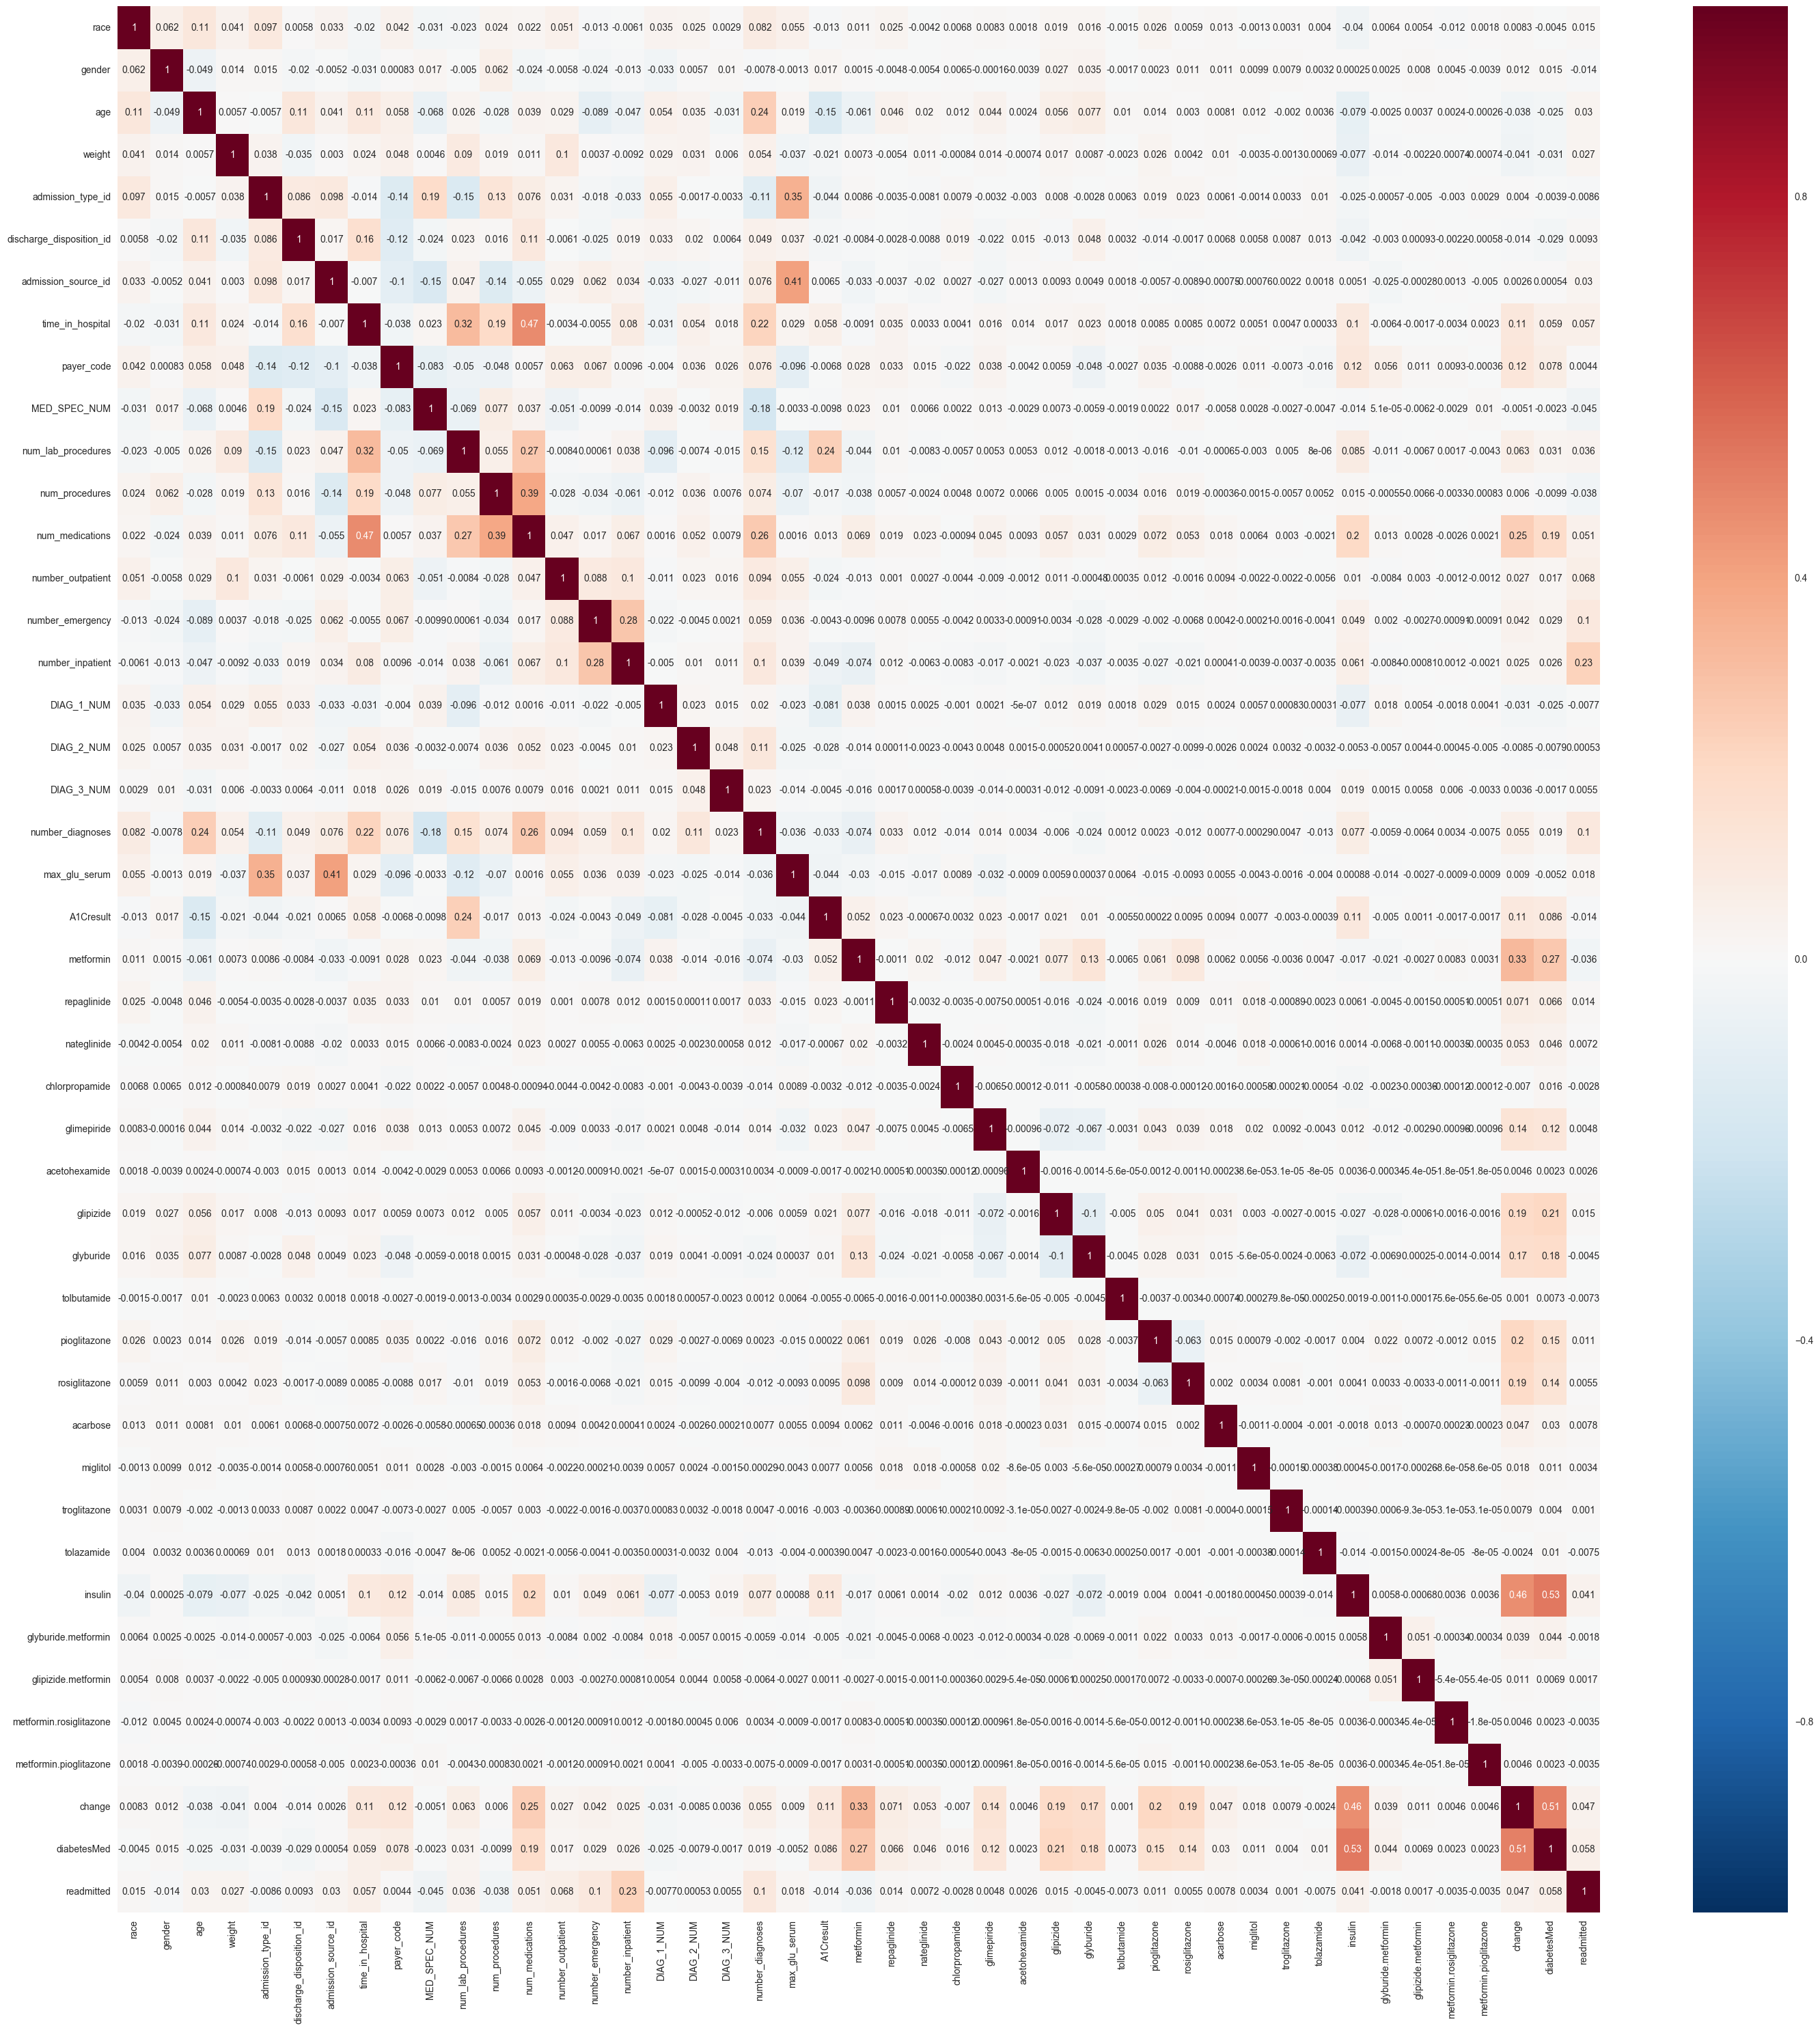

In [22]:
# heatmap for correlation
plt.figure(figsize=(35,36))
sns.heatmap(df.corr(), annot=True)

In [23]:
# describe for a single column
df['readmitted'].describe()

count    56000.000000
mean         0.572268
std          0.685018
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: readmitted, dtype: float64

In [24]:
# how many unique values in the 'pep' column
df.groupby('readmitted').size()

readmitted
0    30238
1    19477
2     6285
dtype: int64

In [25]:
# how many missing values in each column or variable
df.isnull().sum()

race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
MED_SPEC_NUM                0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
DIAG_1_NUM                  0
DIAG_2_NUM                  0
DIAG_3_NUM                  0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [26]:
# pivot talbe for survivied
df.groupby(['readmitted']).count()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,MED_SPEC_NUM,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,,,,,
0,30238,30238,30238,30238,30238,30238,30238,30238,30238,30238,...,30238,30238,30238,30238,30238,30238,30238,30238,30238,30238
1,19477,19477,19477,19477,19477,19477,19477,19477,19477,19477,...,19477,19477,19477,19477,19477,19477,19477,19477,19477,19477
2,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285,...,6285,6285,6285,6285,6285,6285,6285,6285,6285,6285


In [27]:
# pivot table for 'pep' showing mean value, not count
df.groupby(['readmitted']).mean()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,MED_SPEC_NUM,...,miglitol,troglitazone,tolazamide,insulin,glyburide.metformin,glipizide.metformin,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed
readmitted,,,,,,,,,,,,,,,,,,,,,
0,2.589060,0.472088,6.050665,0.098717,2.025994,3.818606,5.613665,4.254415,4.325617,11.423771,...,0.000628,0.000066,0.000926,1.017792,0.013030,0.000265,0.000066,0.000066,0.438587,0.744857
1,2.614930,0.454177,6.146121,0.164091,2.012887,3.324383,5.958053,4.508703,4.467834,9.700056,...,0.001284,0.000205,0.000616,1.097808,0.014376,0.000411,0.000000,0.000000,0.491605,0.799096
2,2.624821,0.459666,6.164041,0.120923,1.985521,4.487828,5.820366,4.747176,4.274781,10.037232,...,0.000636,0.000000,0.000000,1.135561,0.010501,0.000318,0.000000,0.000000,0.488942,0.799204
